In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, exp
from scipy import fft

In [2]:
# v = np.zeros(1001, dtype=float)
dz = 10
c = 3000
pho = 3000
c_33 = c * c * pho
t_max = 1.
nt = 1001
dt = t_max / nt
t_array = np.linspace(0, t_max, nt)
f_m = 25

In [3]:
source_array = np.zeros(int(0.04/dt) * 2 + 1)
for tk , t in enumerate(np.arange(0, 0.04 * 2, dt)):
    source_array[tk] = \
        (1 - 2 * (pi * f_m * (t-0.04))**2) * \
            exp(-(pi * f_m * (t-0.04))**2)

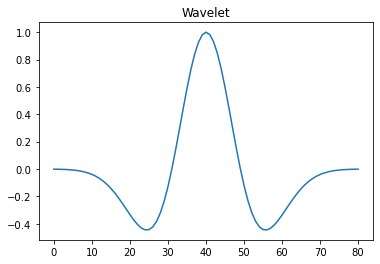

In [4]:
plt.plot(source_array)
plt.title('Wavelet')
plt.show()

In [5]:
v = np.zeros((1001,1001), dtype=float)    
u = np.zeros(1001, dtype=float)
tau = np.zeros(1001, dtype=float)

kernal_u = np.array([0, 1, -1])
kernal_tau = np.array([1, -1, 0])

for tk, tt in enumerate(t_array):
    if tk > 0:
        
        u_z = np.convolve(u, kernal_u, mode='same')
        tau = u_z * dt * c_33 / dz + tau
        
        tau_z = np.convolve(tau, kernal_tau, mode='same')
        u = tau_z * dt / (dz * pho) + u
        
        if (tk < len(source_array)):
            u[500] += source_array[tk]
        v[:,tk] = u

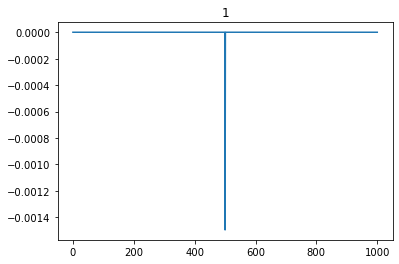

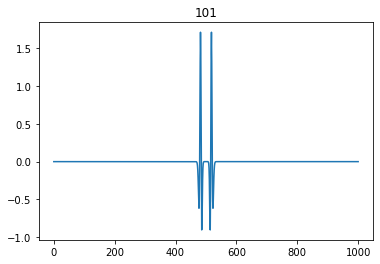

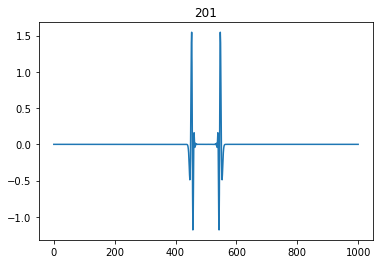

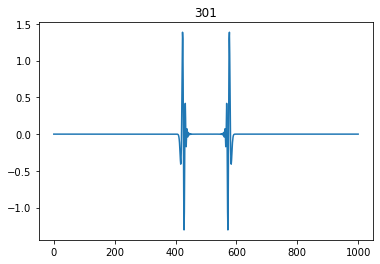

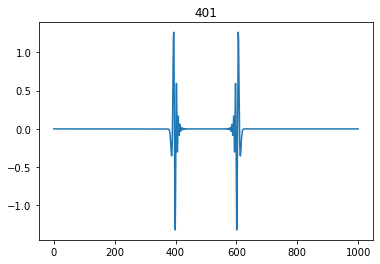

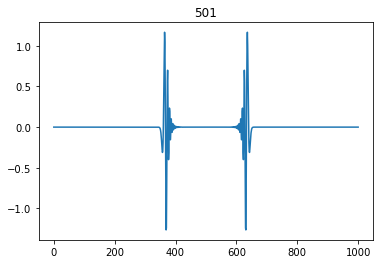

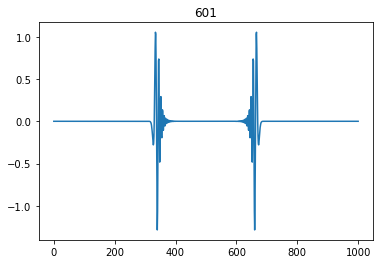

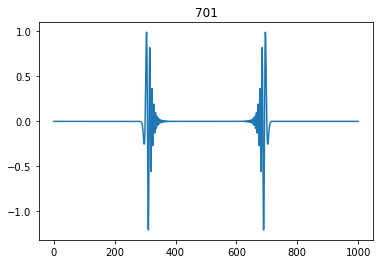

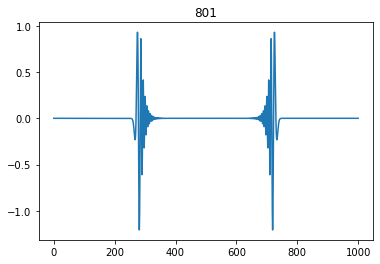

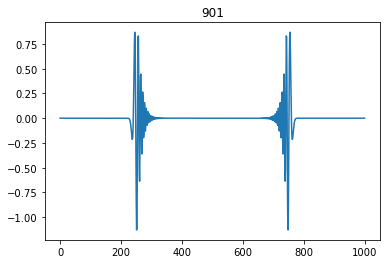

In [9]:
for tk, tt in enumerate(t_array):
    if tk % 100 == 1:
        plt.plot(v[:,tk])
        plt.title(str(tk))
        plt.show()

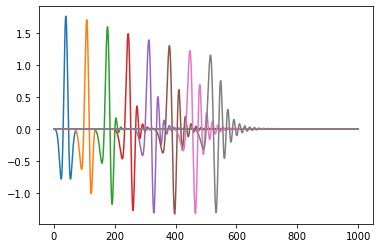

In [7]:
plt.plot(v[500,:])
plt.plot(v[520,:])
plt.plot(v[540,:])
plt.plot(v[560,:])
plt.plot(v[580,:])
plt.plot(v[600,:])
plt.plot(v[620,:])
plt.plot(v[640,:])
# plt.legend()
plt.show()

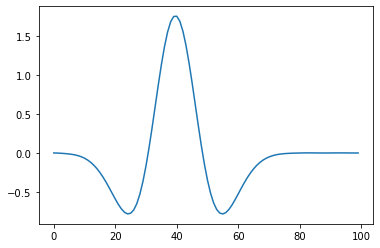

In [8]:
# a = np.where(v[500,:]!=0)
# plt.plot(v[500,a[0][0]:a[0][0]+100])
plt.plot(v[500,0:100])
plt.show()

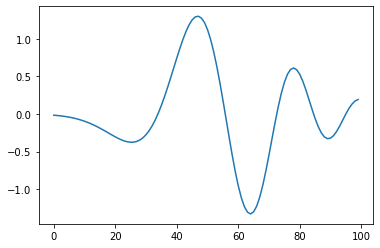

In [171]:
a = np.where(v[600,:]!=0)
plt.plot(v[600,0 + int((100*dz)/(c*dt)):int((100*dz)/(c*dt))+100])
plt.show()

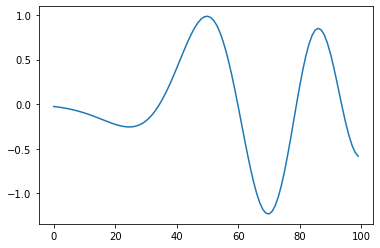

In [169]:
a = np.where(v[700,:]!=0)
plt.plot(v[700,int((200*dz)/(c*dt)):int((200*dz)/(c*dt))+100])
plt.show()

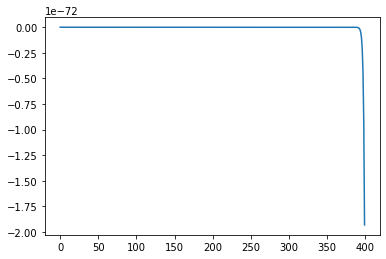

In [152]:
a = np.where(v[160,:]!=0)
plt.plot(v[160,a[0][0]:a[0][0]+400])
plt.show()

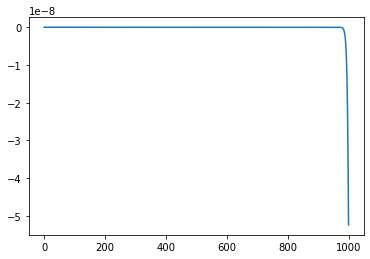

In [153]:
plt.plot(v[180,:])
plt.show()

In [157]:
result = np.fft.fft(v[500,:])

[0.00707587 0.12343629 0.42728206 ... 0.79150244 0.42728206 0.12343629]


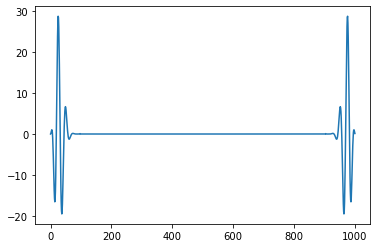

In [161]:
print(result.real)
plt.plot(result.real)
plt.show()

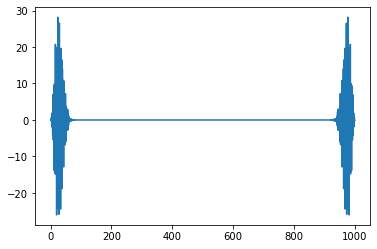

In [162]:
result_600 = np.fft.fft(v[600,:])
plt.plot(result_600.real)
plt.show()

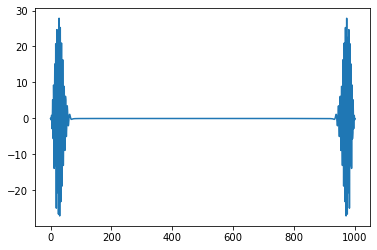

In [163]:
result_700 = np.fft.fft(v[700,:])
plt.plot(result_700.real)
plt.show()